# Introduction to Text Mining Part 1 - Exercises

## Exercise 1

#### Task 1
##### Import the required packages.
##### Set `main_dir` to the location of your `booz-allen-hamilton` folder.
##### Make `data_dir` from the `main_dir` and concatenate remainder of the path to data directory.
##### Set the working directory to `data_dir`.
##### Check if the working directory is updated to `data_dir`.

#### Result:

In [3]:
from pathlib import Path
import os

# home directory
home_dir = Path.home()
# set main directory
main_dir = home_dir / "Documents" / "NLP_Intro" / "intro-to-text-mining-main"
data_dir = main_dir / "Data"
os.chdir(data_dir)

In [4]:
print(home_dir)

/Users/amirmokhtari


In [5]:
print(os.getcwd())

/Users/amirmokhtari/Documents/NLP_Intro/intro-to-text-mining-main/data


#### Task 2
#####  Load the corpus from `UN_agreement_titles.csv` into a new variable `agreements`.
#####  Print the columns of `agreements`.
#####  Print the first 5 rows and check the output to see if data is loaded correctly.

#### Result:

In [6]:

import os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [7]:
agreements = pd.read_csv("UN_agreement_titles.csv")

In [8]:
agreements.columns

Index(['title', 'reg_number'], dtype='object')

In [9]:
agreements.head(5)

,title,reg_number
0,Agreement concerning arrangements for the hold...,1
1,Declaration recognizing as compulsory the juri...,1
2,Declaration renewing for a further period of f...,1
3,Declaration recognizing as compulsory the juri...,10
4,Convention between the United Kingdom and Fran...,10


#### Task 3
##### Make a series from the dataframe that contains only the `title` column of `agreements` and name it `titles`.
##### Print the first 5 titles. 

#### Result:

In [10]:
titles = agreements.title

In [11]:
titles

0      Agreement concerning arrangements for the hold...
1      Declaration recognizing as compulsory the juri...
2      Declaration renewing for a further period of f...
3      Declaration recognizing as compulsory the juri...
4      Convention between the United Kingdom and Fran...
                             ...                        
995    Exchange of notes constituting an agreement co...
996    Exchange of notes constituting an agreement re...
997    Exchange of notes constituting an agreement re...
998    Exchange of letters constituting an agreement ...
999    Second supplementary Agreement for sales of ag...
Name: title, Length: 1000, dtype: object

## Exercise 2

#### Task 1
##### Tokenize each title in the series `titles` and assign it to `titles_tokenized`.
##### Assign the first tokenized titles to `title_words` and print this out.

##### Note: If you run into look-up error while using word_tokenize, `install punkt from nltk` using the code below

In [12]:
# Packages with tools for text processing.
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/amirmokhtari/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
titles_tokenized = [word_tokenize(titles[i]) for i in range(0,len(titles))]

In [15]:
title_words = titles_tokenized[0]
print(title_words)

['Agreement', 'concerning', 'arrangements', 'for', 'the', 'holding', 'of', 'the', 'fifth', 'session', 'of', 'the', 'Council', 'of', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration', 'at', 'the', 'Palais', 'des', 'Nations', ',', 'Geneva', ',', 'concluded', 'between', 'the', 'United', 'Nations', ',', 'the', 'League', 'of', 'Nations', 'and', 'the', 'United', 'Nations', 'Relief', 'and', 'Rehabilitation', 'Administration']


#### Result:

#### Task 2
##### Clean the `titles_words` in the following order:
##### 1. Convert all characters to lower case and assign it to `titles_words`.
##### 2. Remove stop words from `titles_words` and assign it to `titles_words`.
##### 3. Remove punctuation, numbers, and all other symbols that are not letters of the alphabet 
#####    from `titles_words` and assign it to `titles_words`.
##### 4. Stem words in `titles_words` and assign it to `titles_words`.

In [16]:
stop_words = stopwords.words('english')
titles_words = [None]*len(titles_tokenized)
word_counts_per_titles = [None]*len(titles_tokenized)
for i in range(len(titles_words)):
    titles_words[i] = titles_tokenized[i]
    # 1
    titles_words[i] = [word.lower() for word in titles_words[i]]
    # 2
    titles_words[i] = [word for word in titles_words[i] if not word in stop_words]
    # 3
    titles_words[i] = [word for word in titles_words[i] if word.isalnum()]
    # 4
    titles_words[i] = [PorterStemmer().stem(word) for word in titles_words[i]]
    # 5
    word_counts_per_titles[i] = len(titles_words[i])

In [17]:
titles_words[12]
word_counts_per_titles[12]

16

##### Note: If you run into look-up error while using stopwords, `install stopwords from nltk` using the code below.

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amirmokhtari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Result:

#### Task 3
##### Create an empty list `titles_clean` whose length is same as `titles_tokenized`.
##### Perform the above steps on the list `titles_tokenized` and also record the length of each title in 'word_counts_per_titles'.
##### Check the first 10 words in 300th title.

#### Result:

In [19]:
word_counts_per_titles[300]

16

#### Task 4
##### Print the first 10 rows of `word_counts_per_titles` .
##### Plot a histogram for  `word_counts_per_titles`, and set bins to number of unique values in the list.

In [20]:
word_counts_per_titles[:10]

[26, 29, 38, 19, 19, 15, 15, 10, 7, 10]

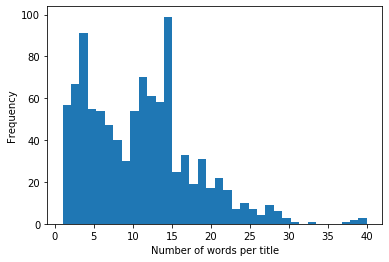

In [21]:
plt.hist(word_counts_per_titles, bins = len(set(word_counts_per_titles))) 
plt.xlabel('Number of words per title') 
plt.ylabel('Frequency');

#### Result:

In [22]:
titles_clean = titles_words

#### Task 5
##### Convert word counts list and snippets list to numpy arrays named `ex_word_counts_array` and  `titles_array` and print the length of  `titles_array`.
##### Find indices of all snippets where there are greater than or equal to 3 words and save it to `valid_titles`. Print length of `valid_titles`.
##### Subset the `titles_array` to keep only those where there are at least 3 words. Print length of `titles_array`.
##### Convert it back to a list `titles_clean`.  Print first 5 rows of `titles_clean`.
##### Combine word tokens in each titles into a single string and save the result as a list called `titles_clean_list`. Print the first 5 titles in `titles_clean_list`.

In [23]:
titles_array = np.array(titles_clean)
ex_word_counts_array = np.array(word_counts_per_titles)


In [24]:
len(titles_array)

1000

In [25]:
titles_array

array([list(['agreement', 'concern', 'arrang', 'hold', 'fifth', 'session', 'council', 'unit', 'nation', 'relief', 'rehabilit', 'administr', 'palai', 'de', 'nation', 'geneva', 'conclud', 'unit', 'nation', 'leagu', 'nation', 'unit', 'nation', 'relief', 'rehabilit', 'administr']),
       list(['declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', '36', 'paragraph', '2', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', '13', 'februari', '1946']),
       list(['declar', 'renew', 'period', 'five', 'year', 'begin', '12', 'februari', '1951', 'declar', 'recogn', 'compulsori', 'jurisdict', 'court', 'conform', 'articl', '36', 'paragraph', '2', 'statut', 'intern', 'court', 'justic', 'legal', 'disput', 'concern', 'interpret', 'applic', 'valid', 'treati', 'relat', 'boundari', 'british', 'hondura', 'london', '13', 'februari', '1946']),
       list(['declar', 'recog

In [26]:
valid_titles = titles_array(index in ex_word_counts_array if index >= 3)

SyntaxError: invalid syntax (<ipython-input-26-c5d2da2041ec>, line 1)

#### Result:

#### Task 6
##### Use the function we defined in class that takes a list of character strings and a name of an output file and writes it into a txt file.

In [30]:
# Define function.
def write_lines(lines, filename):   #<- given lines to write and filename
    joined_lines = '\n'.join(lines) #<- join lines with line breaks
    file = open(ex_out_filename, 'w')  #<- open write only file 
    file.write(joined_lines)        #<- write lines to file
    file.close()                    #<- close connection

##### Save output file name to a variable `ex_out_filename` and call the text file "ex_clean_titles.txt".

#### Result:

## Exercise 3

#### Task 1
##### Create a `CountVectorizer()` and save it as `ex_vec`.
##### Create a DTM of the `titles_clean_list` and name it `ex_X`.
##### Convert `ex_X` to an array.
##### Print the  first 20 feature names of `ex_vec`.
##### Convert `ex_X` to a pandas dataframe `ex_DTM` and print the top 5 lines.

#### Result:

#### Task 2
##### Use the convenience function that sorts and looks at first n-entries in the dictionary we defined in class.

In [36]:
def HeadDict(dict_x, n):
    # Get items from the dictionary and sort them by
    # value key in descending (i.e. reverse) order.
    sorted_x = sorted(dict_x.items(),
    reverse = True,
    key = lambda kv: kv[1])
    # Convert sorted dictionary to a list.
    dict_x_list = list(sorted_x)
    # Return the first `n` values from the dictionary only.
    return(dict(dict_x_list[:n]))

#####  Sum the counts of each word in all documents and save the series as a dictionary `ex_corpus_freq_dist`.
##### Print the top 30 words and their counts in `ex_corpus_freq_dist`.

#### Result:

#### Task 3
##### Save `ex_X`, `ex_DTM`, `ex_word_counts_array`, `valid_titles`, `titles_clean`,  `titles_clean_list` and `ex_corpus_freq_dist`  files as pickles `ex_DTM_matrix`, `ex_DTM`, `ex_word_counts_array`, `valid_titles`, `ex_titles_clean`, `ex_titles_clean_list` and `ex_corpus_freq_dist` to be used in the next module.

#### Result: